#Malaria Prevalence Survey (2000–2022) – Malawi

Malaria remains a significant public health challenge in many parts of the world, including Malawi. Understanding the patterns and trends of malaria prevalence is crucial for effective control and prevention strategies. This notebook analyzes data from malaria prevalence surveys conducted in Malawi between 2000 and 2022 to explore how malaria prevalence has changed over time, across different age groups, and in various locations within the country. By examining these trends, we aim to gain insights into the impact of interventions and identify areas where further efforts are needed to reduce the burden of malaria.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing and cleaning the data

In [ ]:
data = pd.read_csv('/content/malaria.csv')

# renaming the fields
data = data.rename(columns={
    "Lat": "Latitude",
    "Long": "Longitude",
    "YY": "Year",
    "Ex": "Examined",
    "Pf": "Positive",
    "PfPR2_10": "Prevalence_2-10",
    "LoAge": "Lower_age",
    "UpAge": "Upper_age"
})

# Check for missing values
null_fields = data.isnull().sum() # no missing values from our original data set

# Creating a MidAge column
data["MidAge"] = (data["Lower_age"] + data["Upper_age"]) / 2

# ===== function to assign Age Groups ==== #
def assign_age_group(row):
    lo, up = row["Lower_age"], row["Upper_age"]

    if up <= 10:
        return "Children (0-10)"
    elif lo >= 11 and up <= 17:
        return "Teens (11-17)"
    elif lo >= 18 and up <= 35:
        return "Young Adults (18-35)"
    elif lo >= 36 and up <= 60:
        return "Adults (36-60)"
    elif lo > 60:
        return "Older Adults (60+)"
    else:
        return "Mixed"

data["Age_Group"] = data.apply(assign_age_group, axis=1)


# Quick check
print(data[["Lower_age", "Upper_age", "MidAge", "Age_Group"]].sample(20))


      Lower_age  Upper_age     MidAge        Age_Group
900    0.000000   5.000000   2.500000  Children (0-10)
2355   0.531143   4.317591   2.424367  Children (0-10)
562    0.700000  12.200000   6.450000            Mixed
23     1.000000   4.400000   2.700000  Children (0-10)
1349   0.600000   4.900000   2.750000  Children (0-10)
255    6.000000  25.000000  15.500000            Mixed
1390   0.000000   4.900000   2.450000  Children (0-10)
867    8.000000  28.000000  18.000000            Mixed
1465   0.000000   4.900000   2.450000  Children (0-10)
800    0.500000   4.900000   2.700000  Children (0-10)
103    0.500000   4.900000   2.700000  Children (0-10)
35     1.300000  14.400000   7.850000            Mixed
931    0.700000   4.900000   2.800000  Children (0-10)
1508  10.000000  14.000000  12.000000            Mixed
100    0.800000  14.900000   7.850000            Mixed
2490   7.000000  46.000000  26.500000            Mixed
1884   7.000000  29.000000  18.000000            Mixed
753    0.8

## Analytics

### prevalence by age group

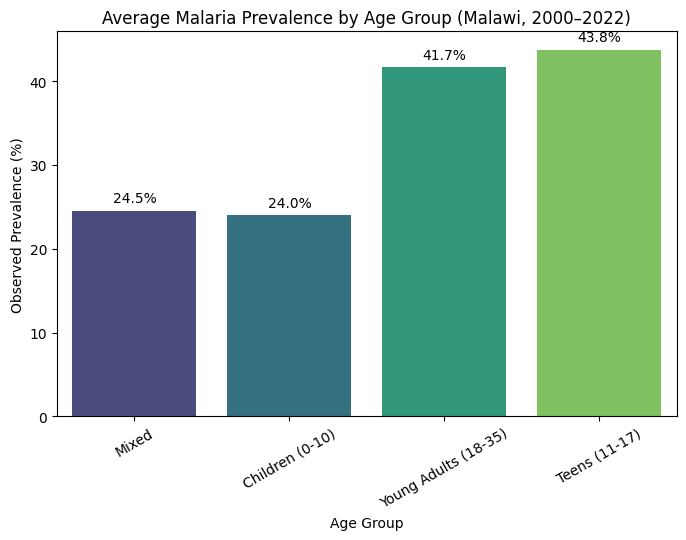

<Figure size 640x480 with 0 Axes>

In [52]:
df = data.copy()
# 1. Calculating observed prevalence (%)
df["Observed_Prevalence"] = (df["Positive"] / df["Examined"]) * 100

# 2. Group by Age_Group and computing mean observed prevalence
age_group_stats = df.groupby("Age_Group")["Observed_Prevalence"].mean().sort_values()

# 3. Bar chart of average observed prevalence by age group
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=df,
    x="Age_Group",
    y="Observed_Prevalence",
    hue="Age_Group",        # assign colors by age group
    estimator="mean",
    errorbar=None,
    palette="viridis",
    legend=False
)

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=height + 1,       # slightly above the bar
        s=f'{height:.1f}%', # formatted as 1 decimal percent
        ha='center'
    )

plt.title("Average Malaria Prevalence by Age Group (Malawi, 2000–2022)")
plt.ylabel("Observed Prevalence (%)")
plt.xlabel("Age Group")
plt.xticks(rotation=30)
plt.show()

### time trend plot for each age group

In [ ]:
# Grouping by Year and Age_Group, computing mean observed prevalence
yearly_trends = df.groupby(["Year", "Age_Group"])["Observed_Prevalence"].mean().reset_index()
yearly_trends.head()

,Year,Age_Group,Observed_Prevalence
0,2000,Children (0-10),37.513880
1,2000,Mixed,47.999027
2,2001,Mixed,57.672619
3,2001,Teens (11-17),75.000000
4,2001,Young Adults (18-35),57.142857


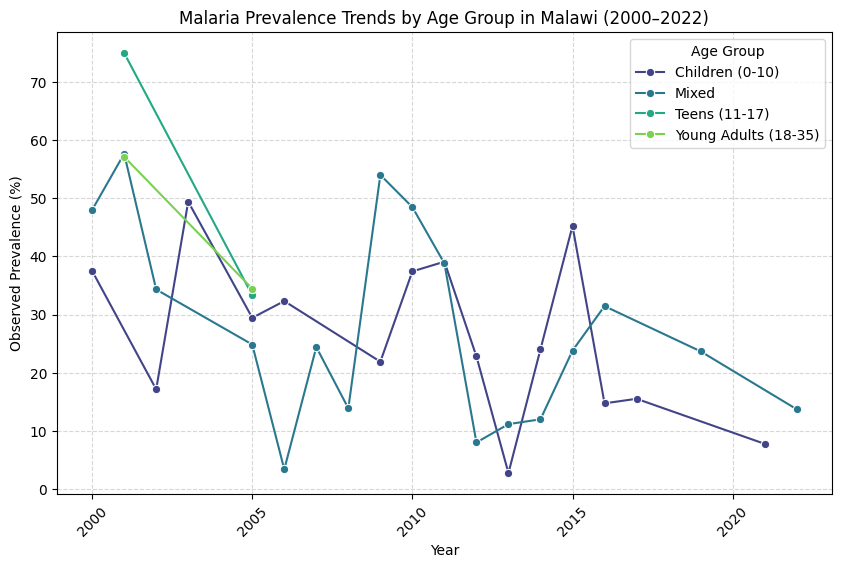

<Figure size 640x480 with 0 Axes>

In [53]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=yearly_trends,
    x="Year",
    y="Observed_Prevalence",
    hue="Age_Group",
    marker="o",
    palette="viridis"
)

plt.title("Malaria Prevalence Trends by Age Group in Malawi (2000–2022)")
plt.ylabel("Observed Prevalence (%)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend(title="Age Group")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
plt.savefig("time-trend.png", dpi=300)

### Explaination

While children are a vulnerable group, malaria isn’t only a children’s disease. Teens and young adults show even higher prevalence, highlighting the need for broader prevention programs across age groups.

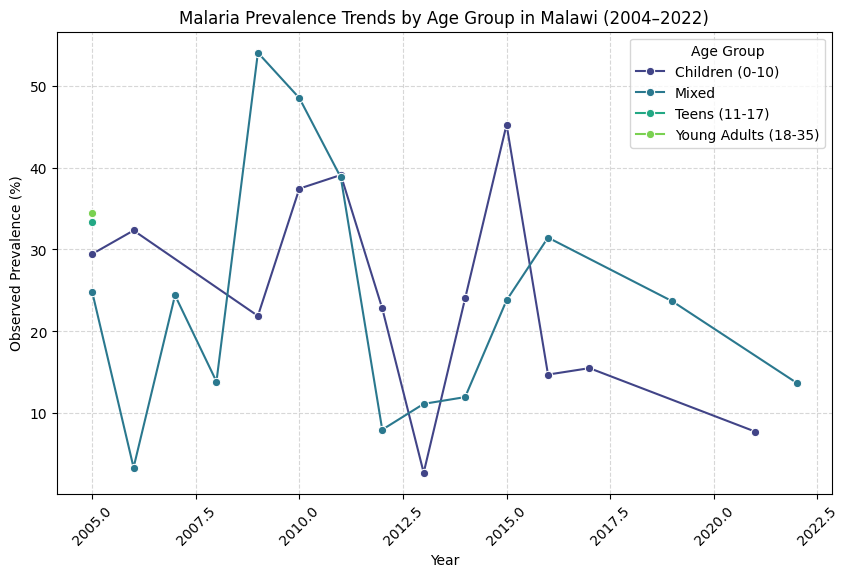

In [42]:
# Filtering data for years 2004 and above
filtered_yearly_trends = yearly_trends[yearly_trends["Year"] >= 2004].copy()

# Plotting
plt.figure(figsize=(10,6))
sns.lineplot(
    data=filtered_yearly_trends,
    x="Year",
    y="Observed_Prevalence",
    hue="Age_Group",
    marker="o",
    palette="viridis"
)

plt.title("Malaria Prevalence Trends by Age Group in Malawi (2004–2022)")
plt.ylabel("Observed Prevalence (%)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend(title="Age Group")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Malaria prevalence has shown sharp ups and downs since 2004. Among children (0–10), prevalence was above 30% through 2011, then dropped dramatically by 2013, likely due to scaled-up bed net campaigns. However, a spike in 2015 highlights the persistent risk of resurgence. Encouragingly, by 2021 prevalence had fallen to below 8%, showing that progress is possible but fragile. Notably, teens and young adults also carried a heavy malaria burden in earlier surveys an often-overlooked group in interventions.

## Has malaria prevalence in Malawi decreased overall since 2005?

Average prevalence in 2000 : 40.79 %
Average prevalence in 2022 : 13.71 %


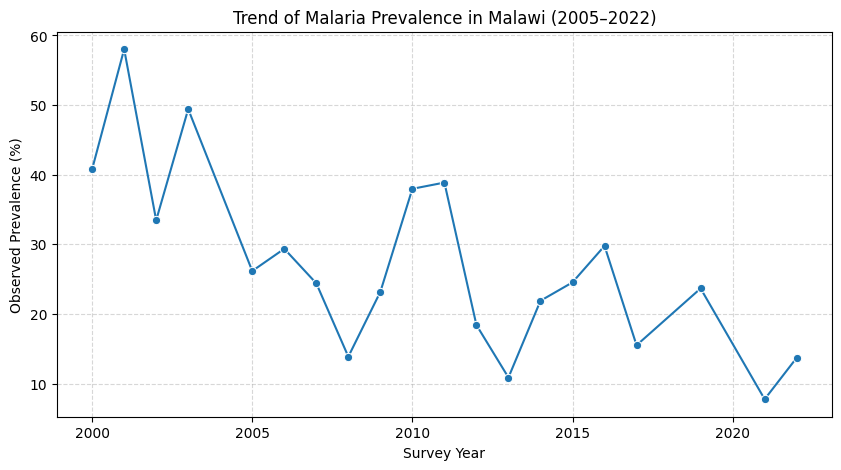

<Figure size 640x480 with 0 Axes>

In [54]:
# 1. Computing average prevalence per year
yearly_trend = df.groupby("Year")["Observed_Prevalence"].mean().reset_index()

# 2. Quick stats
start_year = yearly_trend.iloc[0]
end_year = yearly_trend.iloc[-1]

print("Average prevalence in", int(start_year["Year"]), ":", round(start_year["Observed_Prevalence"], 2), "%")
print("Average prevalence in", int(end_year["Year"]), ":", round(end_year["Observed_Prevalence"], 2), "%")

# 3. Ploting
plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_trend, x="Year", y="Observed_Prevalence", marker="o")
plt.title("Trend of Malaria Prevalence in Malawi (2005–2022)")
plt.ylabel("Observed Prevalence (%)")
plt.xlabel("Survey Year")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


This suggests that Malawi has made substantial progress in malaria control over the past two decades.

## Trends in years

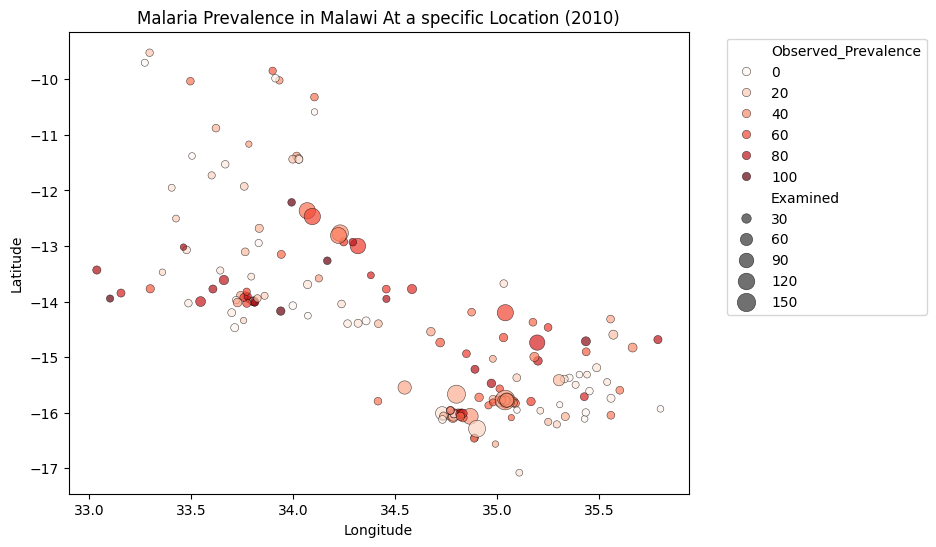

<Figure size 640x480 with 0 Axes>

In [55]:

# Ploting for a single year (e.g., 2010)
year = 2010
df_year = df[df["Year"] == year]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_year,
    x="Longitude", y="Latitude",
    size="Examined", sizes=(20, 200),
    hue="Observed_Prevalence", palette="Reds", alpha=0.7, edgecolor="k"
)

plt.title(f"Malaria Prevalence in Malawi At a specific Location ({year})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()
plt.savefig("trend-in-2010", dpi=300)

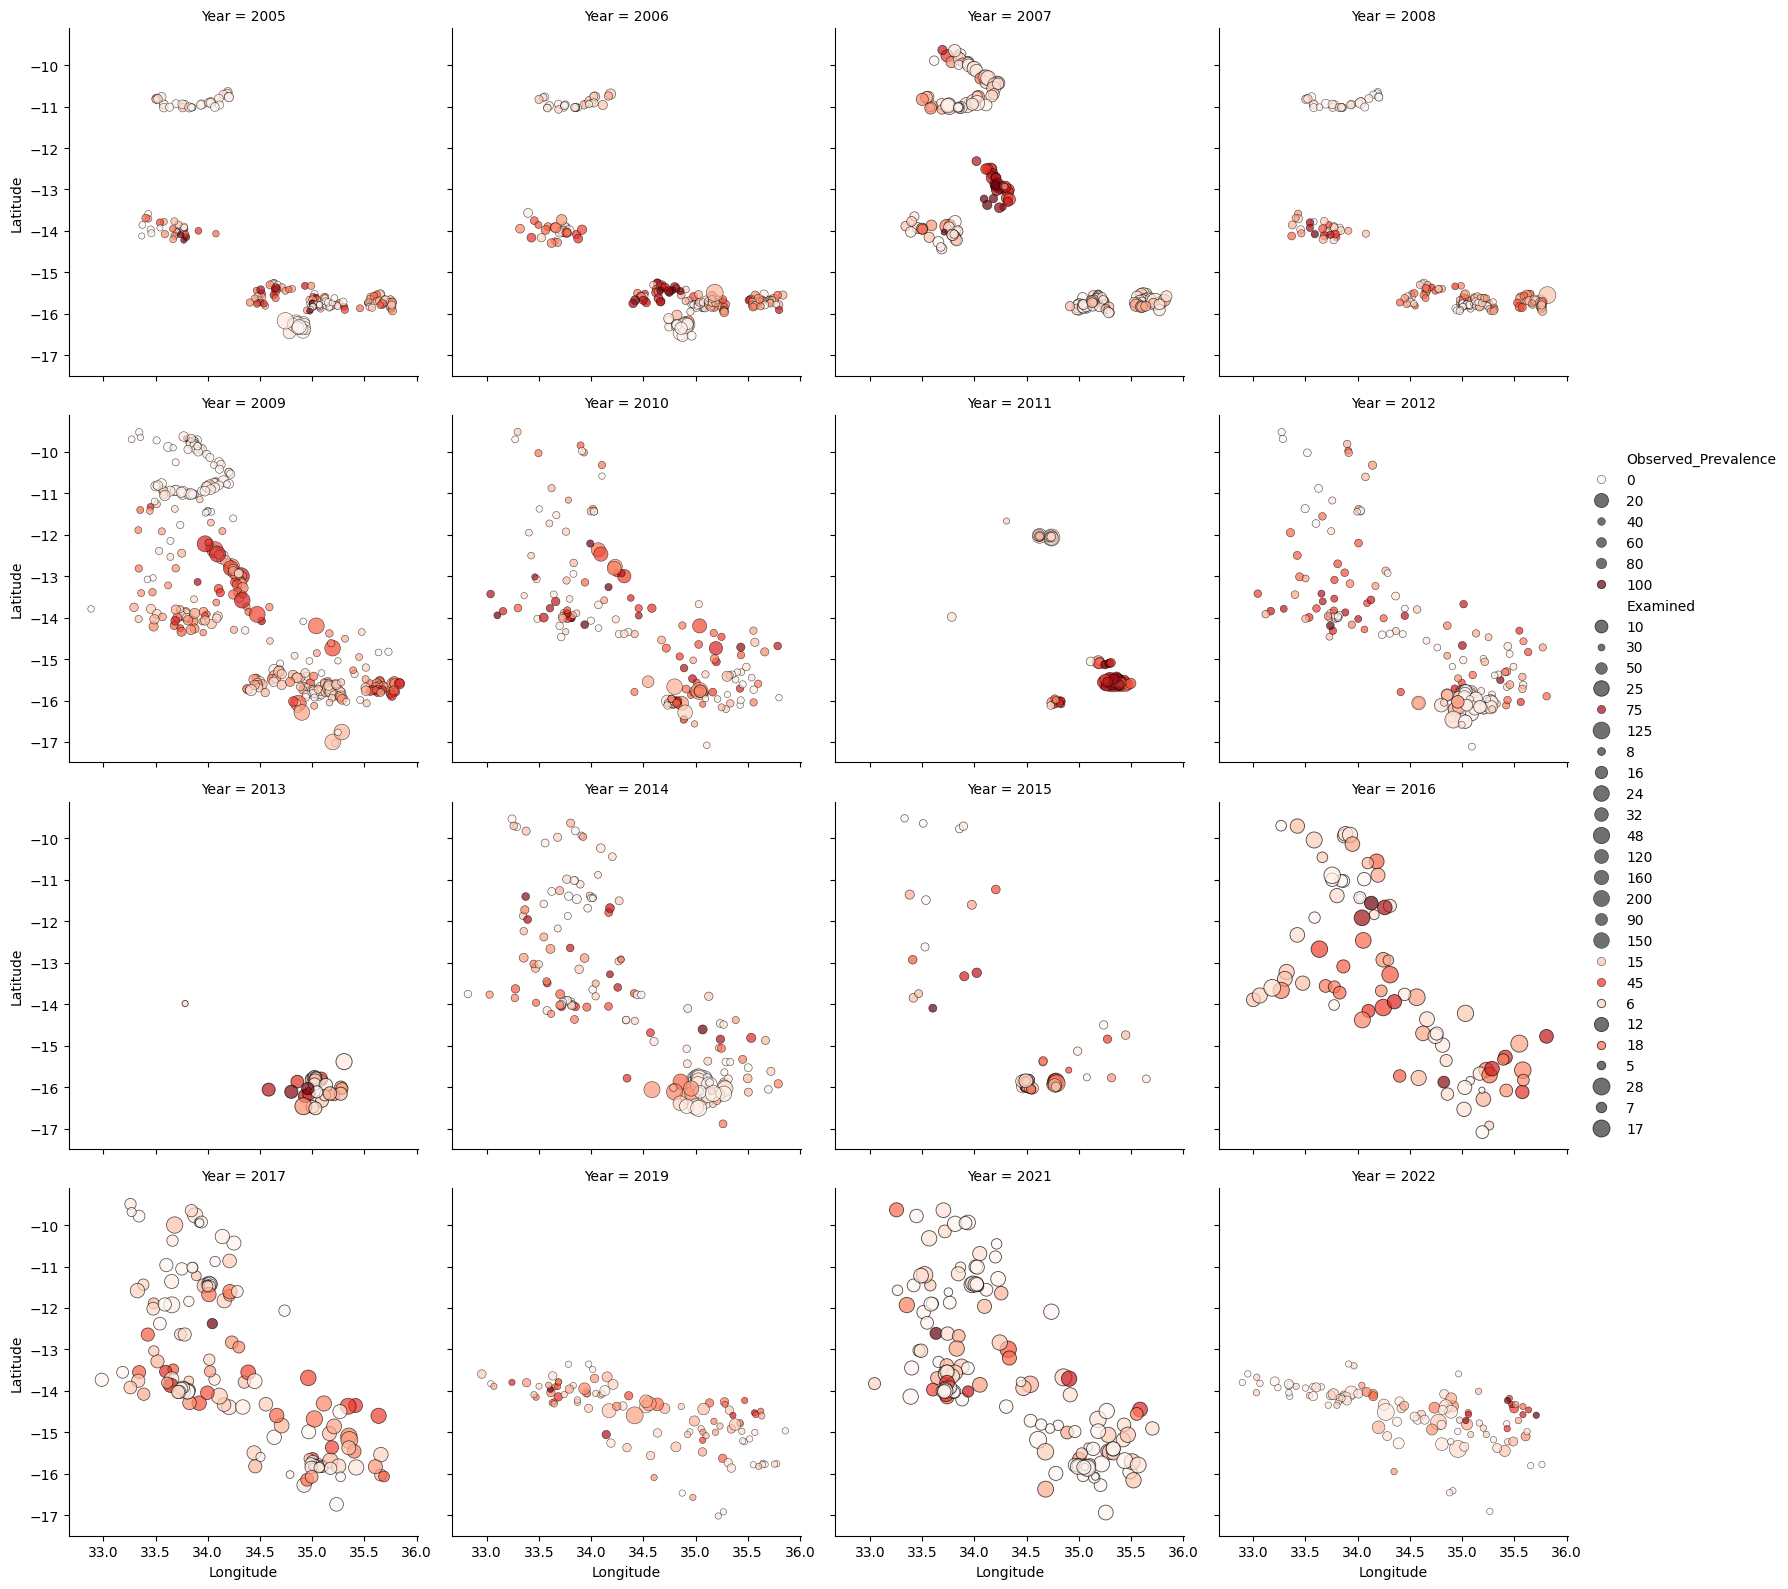

In [49]:
g = sns.FacetGrid(df[df["Year"] >= 2005], col="Year", col_wrap=4, height=4)
g.map_dataframe(sns.scatterplot, x="Longitude", y="Latitude", hue="Observed_Prevalence", size="Examined",
                sizes=(20,150), palette="Reds", alpha=0.7, edgecolor="k")
g.set_axis_labels("Longitude", "Latitude")
g.add_legend()
plt.show()
